In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nifty5 as ift
from IPython.display import Image
import matplotlib
#matplotlib.rcParams['text.usetex'] = True

In [5]:
run_name = 'gan_full_range'
run_dir = '/u/ivkos/sr/{}/'.format(run_name)
loss_dir = run_dir+'loss/'
first_crit = np.loadtxt(loss_dir+'first_crit_cost.txt')
first_crit_sr = np.loadtxt(loss_dir+'first_crit_cost_sr.txt')
first_crit_hr = np.loadtxt(loss_dir+'first_crit_cost_hr.txt')
first_crit_grad = np.loadtxt(loss_dir+'first_crit_cost_grad.txt')

first_gen =  np.loadtxt(loss_dir+'first_gen_cost.txt')
first_gen_gan =  np.loadtxt(loss_dir+'first_gen_cost_gan.txt')
first_gen_inf =  np.loadtxt(loss_dir+'first_gen_cost_inf.txt')

# second_crit = np.loadtxt(loss_dir+'second_crit_cost.txt')
# second_gen = np.loadtxt(loss_dir+'second_gen_cost.txt')

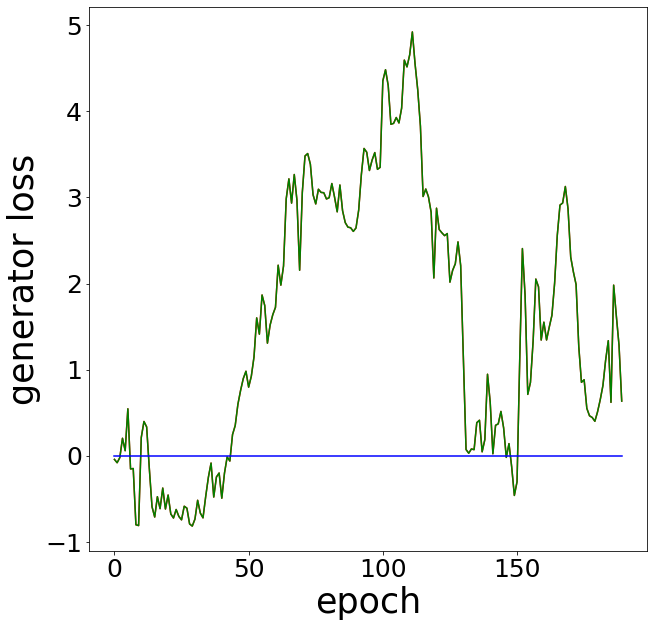

In [6]:
plt.figure(figsize=(10, 10))
#plt.plot(first_crit, label='critic')
plt.plot(first_gen, 'r-', label='generator')
plt.plot(first_gen_gan, 'g-', label='generator gan')
plt.plot(first_gen_inf, 'b-', label='generator l_inf')

# plt.plot(first_crit_sr, label='first critic sr')
# plt.plot(first_crit_hr, label='first critic hr')
# plt.plot(first_crit_grad, label='first critic grad')

# plt.plot(second_crit, label='second critic')
# plt.plot(second_gen, label='second generator')
#plt.yscale('symlog')
plt.xlabel('epoch', fontsize=35)
plt.ylabel('generator loss', fontsize=35)
plt.tick_params(labelsize=25)
#plt.legend()
plt.show()

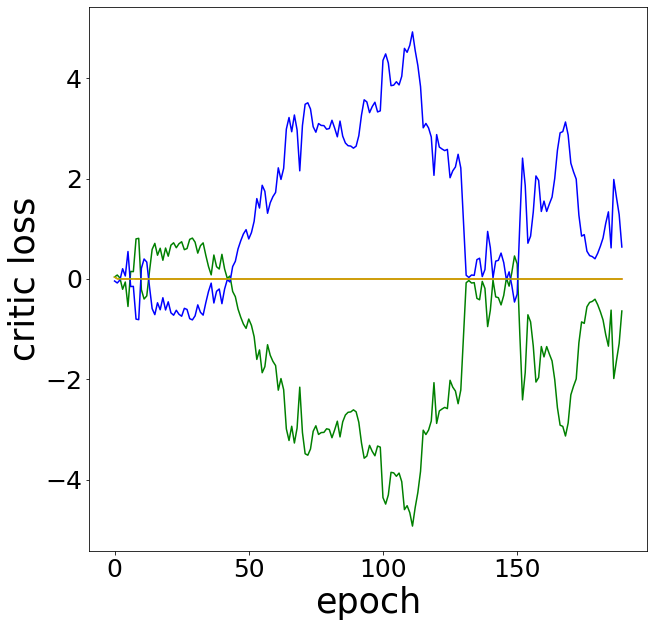

In [7]:
plt.figure(figsize=(10, 10))

plt.plot(first_crit, 'r-', label='critic')
plt.plot(first_crit_sr, 'g-', label='first critic sr')
plt.plot(first_crit_hr, 'b-', label='first critic hr')
plt.plot(first_crit_grad, 'y-', label='first critic grad')

#plt.yscale('symlog')
plt.xlabel('epoch', fontsize=35)
plt.ylabel('critic loss', fontsize=35)
plt.tick_params(labelsize=25)
#plt.legend()
plt.show()

In [8]:
grad_dir = run_dir+'grad/'
first_crit_grad = np.loadtxt(grad_dir+'first_crit_grad.txt')

first_crit_grad_sr = np.loadtxt(grad_dir+'first_crit_grad_sr.txt')
first_crit_grad_hr = np.loadtxt(grad_dir+'first_crit_grad_hr.txt')
first_crit_grad_grad = np.loadtxt(grad_dir+'first_crit_grad_grad.txt')

first_gen_grad =  np.loadtxt(grad_dir+'first_gen_grad.txt')
first_gen_grad_gan =  np.loadtxt(grad_dir+'first_gen_grad_gan.txt')
first_gen_grad_inf =  np.loadtxt(grad_dir+'first_gen_grad_inf.txt')

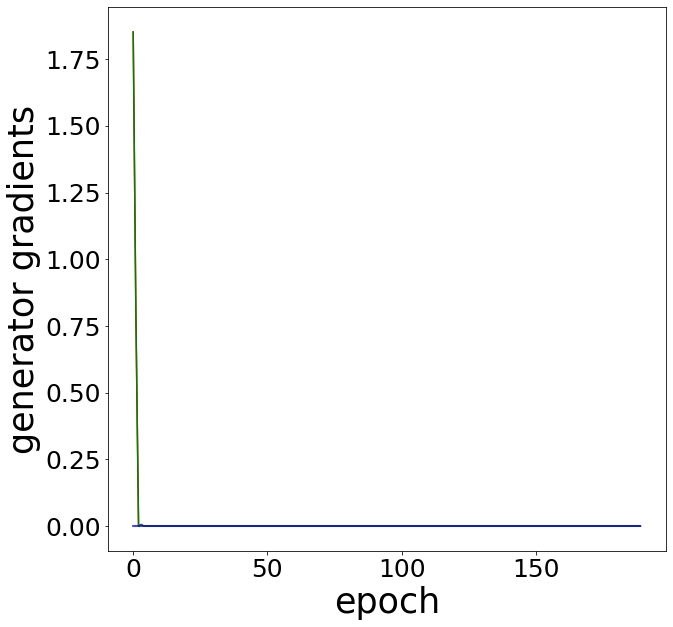

In [9]:
plt.figure(figsize=(10, 10))
#plt.plot(first_crit_grad, label='first critic')

# plt.plot(first_crit_grad_sr, label='first critic sr')
# plt.plot(first_crit_grad_hr, label='first critic hr')
# plt.plot(first_crit_grad_grad, label='first critic grad')

plt.plot(first_gen_grad, 'r-', label='first generator')
plt.plot(first_gen_grad_gan, 'g-', label='first generator gan')
plt.plot(first_gen_grad_inf, 'b-', label='first generator l_inf')

plt.xlabel('epoch', fontsize=35)
plt.ylabel('generator gradients', fontsize=35)
plt.tick_params(labelsize=25)
#plt.yscale('log')
#plt.legend(fontsize=12)
plt.show()

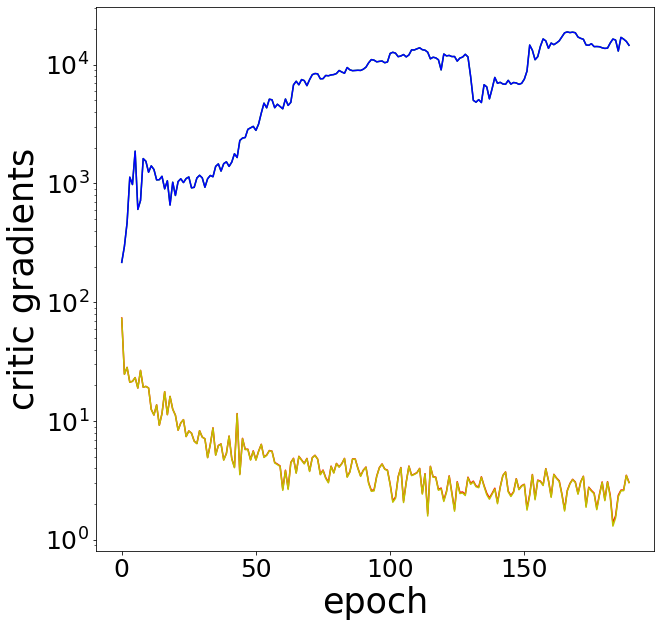

In [10]:
plt.figure(figsize=(10, 10))
plt.plot(first_crit_grad, 'r-', label='first critic')

plt.plot(first_crit_grad_sr, 'g-', label='first critic sr')
plt.plot(first_crit_grad_hr, 'b-', label='first critic hr')
plt.plot(first_crit_grad_grad, 'y-', label='first critic grad')


plt.xlabel('epoch', fontsize=35)
plt.ylabel('critic gradients', fontsize=35)
plt.tick_params(labelsize=25)
plt.yscale('log')
#plt.legend(fontsize=12)
plt.show()

In [11]:
path_to_data = '/u/ivkos/sr/GriddedSimulationsTesting/'
path_to_sr = '/u/ivkos/sr/Output/{}/'.format(run_name)

In [12]:
def scale(data, epsilon=1e-9):
    return np.log(data+epsilon)/25
def unscale(data, epsilon=1e-9):
    return (np.exp(25*(data))-epsilon)

In [13]:
def take_slice(data, axis=0, slice_num=420):
    if axis == 0:
        slice_data = np.zeros(())
        return np.copy(data[slice_num,...])
    elif axis == 1:
        return np.copy(data[:,slice_num,:])
    else:
        return np.copy(data[:,:,slice_num])

In [14]:
sim256_grid512_path = path_to_data+'test256_grid512.npy'
sim512_grid512_path = path_to_data+'test512_grid512.npy' 
sr_path1 = path_to_sr+'{}_sr_output_ckpt1.npy'.format(run_name)
sr_path2 = path_to_sr+'{}_sr_output_ckpt11.npy'.format(run_name)
sr_path3 = path_to_sr+'{}_sr_output_ckpt21.npy'.format(run_name)
sr_path4 = path_to_sr+'{}_sr_output_ckpt31.npy'.format(run_name)
sr_path_final = path_to_sr+'{}_sr_output.npy'.format(run_name)

In [19]:
sim = np.load(sim256_grid512_path)
print(np.amax(sim))
print(np.amin(sim))
print(np.average(sim))  
slice256_grid512 = take_slice(sim)

sim = np.load(sim512_grid512_path)   
print(np.amax(sim))
print(np.amin(sim))
print(np.average(sim))  
slice512_grid512 = take_slice(sim)

sim = np.load(sr_path_final)
print(np.amax(sim))
print(np.amin(sim))
print(np.average(sim))  
sliceSR_final= take_slice(sim)

# sim = np.load(sr_path1)
# print(np.amax(sim))
# print(np.amin(sim))
# print(np.average(sim))  
# sliceSR1= take_slice(sim)

# sim = np.load(sr_path2)
# print(np.amax(sim))
# print(np.amin(sim))
# print(np.average(sim))  
# sliceSR2= take_slice(sim)

# sim = np.load(sr_path3)
# sim = scale(sim)
# print(np.amax(sim))
# print(np.amin(sim))
# print(np.average(sim))  
# sliceSR3= take_slice(sim)

# sim = np.load(sr_path4)
# print(np.amax(sim))
# print(np.amin(sim))
# print(np.average(sim))  
# sliceSR4= take_slice(sim)

del sim

0.8491909
0.0
5.6975878e-05
0.8474966
0.0
5.7038484e-05
0.8491909
0.0
5.6975878e-05


Text(0.5, 1.0, 'SR')

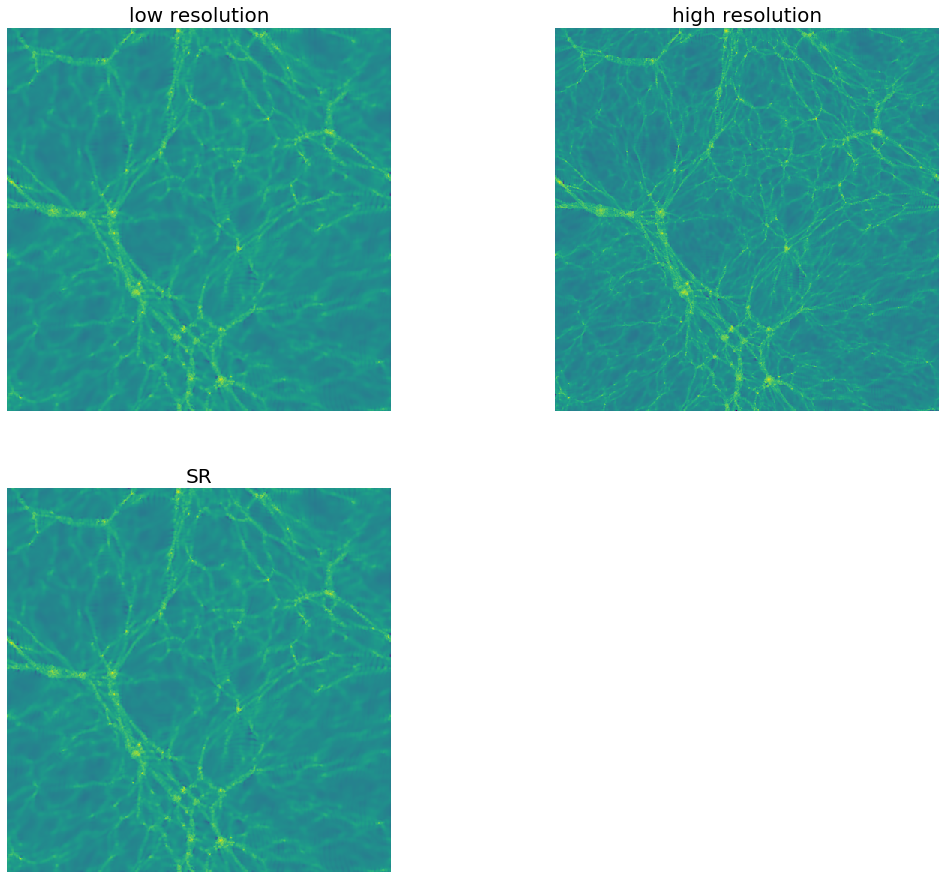

In [20]:
v_min = np.amin(scale(slice512_grid512))
v_max = np.amax(scale(slice512_grid512))

f = plt.figure(figsize=(18, 24))
f.add_subplot(3,2, 1)
plt.imshow(scale(slice256_grid512), label='lr', vmin=v_min, vmax=v_max)
plt.axis('off')
plt.title('low resolution', fontsize=20)

f.add_subplot(3,2, 2)
plt.imshow(scale(slice512_grid512), vmin=v_min, vmax=v_max)
plt.axis('off')
plt.title('high resolution', fontsize=20)

f.add_subplot(3,2, 3)
plt.imshow(scale(sliceSR_final), vmin=v_min, vmax=v_max)
plt.axis('off')
plt.title('SR', fontsize=20)

/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


(-0.5, 511.5, 511.5, -0.5)

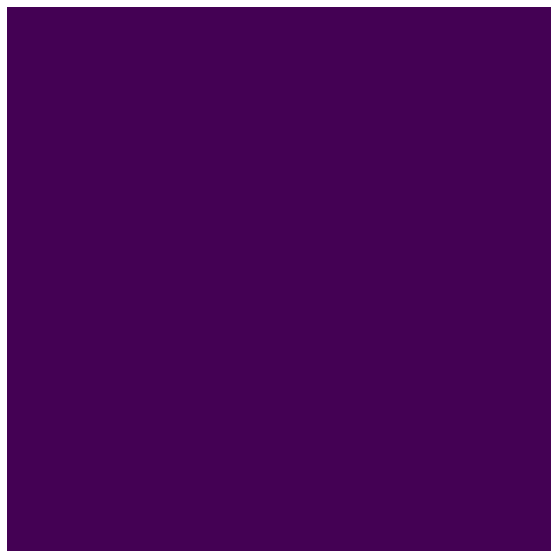

In [18]:
v_min = np.amin(scale(slice512_grid512))
v_max = np.amax(scale(slice512_grid512))

plt.figure(figsize=(10, 10))
plt.imshow(scale(sliceSR_final), label='lr', vmin=v_min, vmax=v_max)
plt.axis('off')

In [96]:
def hist(data, min_value, max_value,bins=100):
    edges = np.logspace(min_value, max_value, bins+1)
    hist, _ = np.histogram(data,edges)
    midpoints = np.zeros(len(edges)-1)
    bin_widths = np.zeros(len(edges)-1)
    for i in range(len(midpoints)):
        midpoints[i] = np.power(10.,np.log10(edges[i])+np.log10(edges[i+1]/edges[i])/2)
        bin_widths[i] = edges[i+1]-edges[i]
    hist = hist/hist.sum()
    hist = hist/bin_widths
    return (midpoints, hist)

In [97]:
sim = np.load(sim512_grid512_path)
delta =  (sim)/np.average(sim)
midpoints, histogram = hist(delta, -3., 5.)
del sim

In [98]:
sim = np.load(sim256_grid512_path)
delta =  (sim)/np.average(sim)
midpoints, histogram256 = hist(delta, -3., 5.)
del sim

In [99]:
sim = np.load(sr_path_final)
delta =  (sim)/np.average(sim)
midpoints, histogram_sr_final = hist(delta, -3., 5.)
del sim

In [41]:
sim = np.load(sr_path2)
delta =  (sim)/np.average(sim)
midpoints, histogram_sr2 = hist(delta, -3., 5.)
del sim

In [42]:
sim = np.load(sr_path3)
delta =  (sim)/np.average(sim)
midpoints, histogram_sr3 = hist(delta, -3., 5.)
del sim

In [ ]:
sim = np.load(sr_path4)
delta =  (sim)/np.average(sim)
midpoints, histogram_sr4 = hist(delta, -3., 5.)
del sim

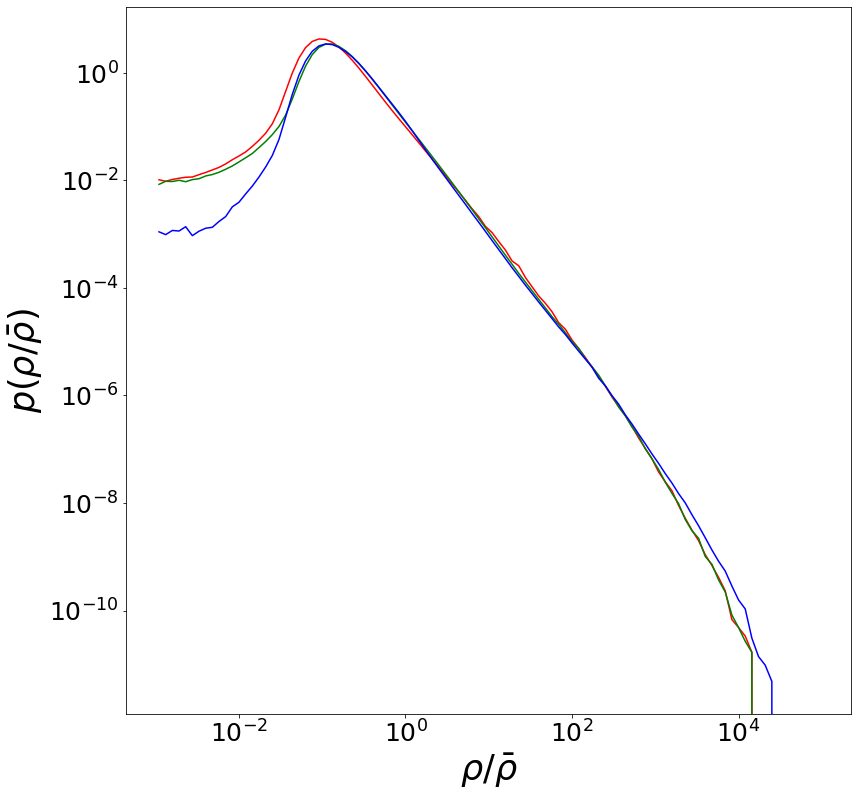

In [102]:
f = plt.figure(figsize=(13, 13))
plt.plot(midpoints, histogram, 'r-', label='sim512')
plt.plot(midpoints, histogram256, 'g-', label='sim256')
plt.plot(midpoints, histogram_sr_final, 'b-', label='SR final')
# plt.plot(midpoints, histogram_sr2, label='SR_ckpt11')
# plt.plot(midpoints, histogram_sr3, label='SR_ckpt21')
# #plt.plot(midpoints, histogram_sr4, label='SR_ckpt31')
plt.xlabel(r'$\rho/\bar{\rho}$', fontsize=35)
plt.ylabel(r'$p(\rho/\bar{\rho})$', fontsize=35)
plt.yscale('log')
plt.xscale('log')
plt.tick_params(labelsize=25)
#plt.legend(fontsize=12)
plt.show()

Plot the relative one point histograms

/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/u/ivkos/conda-envs/nifty/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


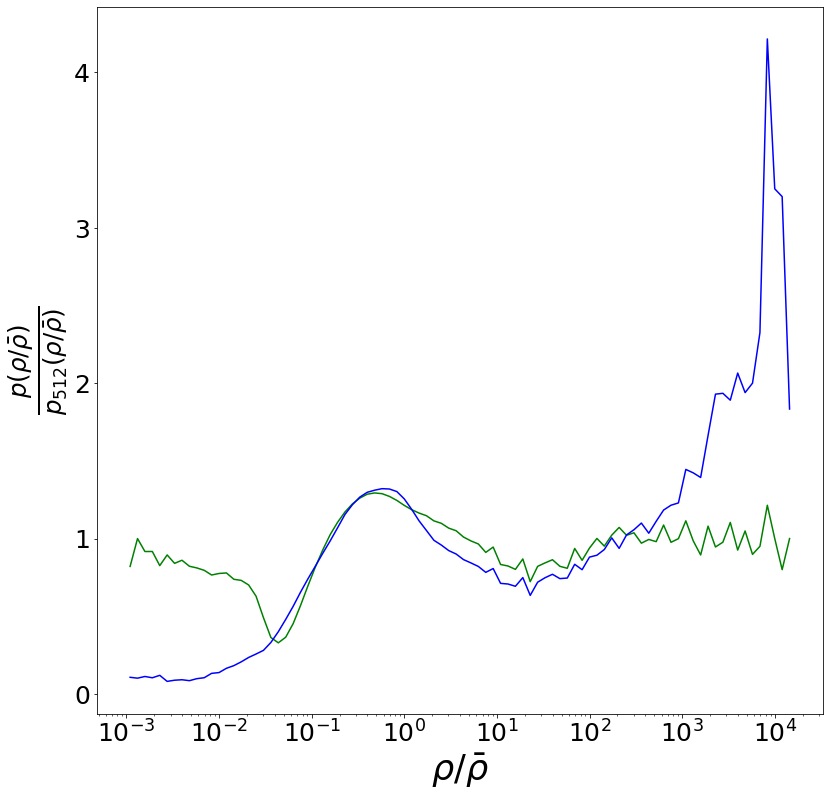

In [104]:
f = plt.figure(figsize=(13, 13))
plt.plot(midpoints, histogram256/histogram, 'g-', label='sim256')
plt.plot(midpoints, histogram_sr_final/histogram, 'b-', label='SR_ckpt1')
# plt.plot(midpoints, histogram_sr2/histogram, label='SR_ckpt11')
# plt.plot(midpoints, histogram_sr3/histogram, label='SR_ckpt21')
#plt.plot(midpoints, histogram_sr4/histogram, label='SR_ckpt31')
#plt.title('Distribution of the relative density', fontsize=30)
plt.xlabel(r'$\rho/\bar{\rho}$', fontsize=35)
plt.ylabel(r'$\frac{p(\rho/\bar{\rho})}{p_{512}(\rho/\bar{\rho})}$', fontsize=35)
plt.xscale('log')
plt.tick_params(labelsize=25)
plt.show()

In [76]:
def powerspectrum(delta,size=10, binsize=50):
    position_space = ift.RGSpace([delta.shape[0], delta.shape[1], delta.shape[2]], 
                                 distances=(size/delta.shape[0], 
                                            size/delta.shape[1], size/delta.shape[2]))
    harmonic_space = position_space.get_default_codomain()
    HT = ift.HartleyOperator(harmonic_space, position_space)
    image = ift.Field.from_global_data(position_space, delta)
    ht_image = HT.inverse(image)
    power_spec = ift.power_analyze(ht_image)
    k_values = power_spec.domain[0].k_lengths
    power_spec = ift.Field.to_global_data(power_spec)
    binned_k = []
    binned_power_spec = []
    binsize = 10
    for i in range(int(power_spec.shape[0]/binsize)):
        binned_k.append(np.average(k_values[i*binsize:(i+1)*binsize]))
        binned_power_spec.append(np.average(power_spec[i*binsize:(i+1)*binsize]))

    spectrum = np.zeros((2, len(binned_k)))
    spectrum[0, ...] = binned_k
    spectrum[1, ...] = binned_power_spec
    return (spectrum[0,...], spectrum[1,...]/size**3)

In [77]:
sim = np.load(sim512_grid512_path)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_512 = powerspectrum(delta)

In [78]:
sim = np.load(sim256_grid512_path)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_256  = powerspectrum(delta)

In [82]:
sim = np.load(sr_path_final)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_sr_final = powerspectrum(delta)

In [50]:
sim = np.load(sr_path2)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_sr2 = powerspectrum(delta)

In [51]:
sim = np.load(sr_path3)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, proj_power_sr3 = powerspectrum(delta)

In [52]:
sim = np.load(sr_path4)
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k , proj_power_sr4 = powerspectrum(delta)

FileNotFoundError: [Errno 2] No such file or directory: '/u/ivkos/sr/Output/gan_l1/gan_l1_sr_output_ckpt31.npy'

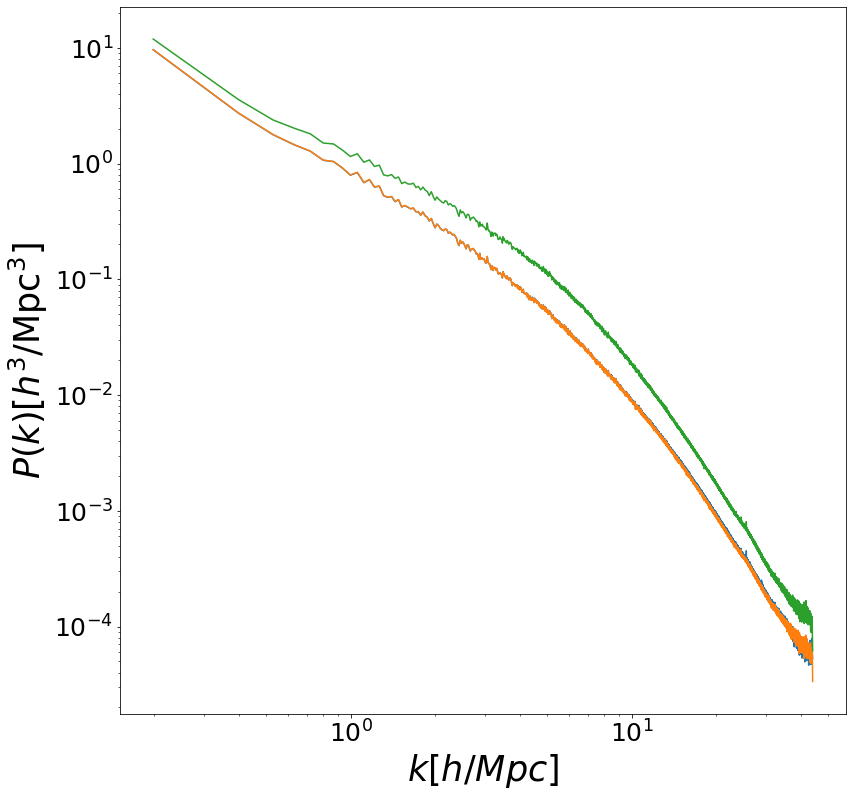

In [88]:
f = plt.figure(figsize=(13, 13))
plt.plot(k, proj_power_512, label='sim512')
plt.plot(k, proj_power_256, label='sim256')
plt.plot(k, proj_power_sr_final, label='SR_ckpt1')
#plt.plot(k, proj_power_sr2, label='SR_ckpt11')
#plt.plot(k, proj_power_sr3, label='SR_ckpt21')
# plt.plot(k, proj_power_sr4, label='SR_ckpt31')
plt.yscale('log')
plt.xscale('log')
#plt.title('Powerspectra', fontsize=30)
plt.xlabel(r'$k[h/Mpc]$', fontsize=35)
plt.ylabel(r'$P(k)[h^3/\mathrm{Mpc}^3]$', fontsize=35)
plt.tick_params(labelsize=25)
#plt.legend(fontsize=12)
plt.show()

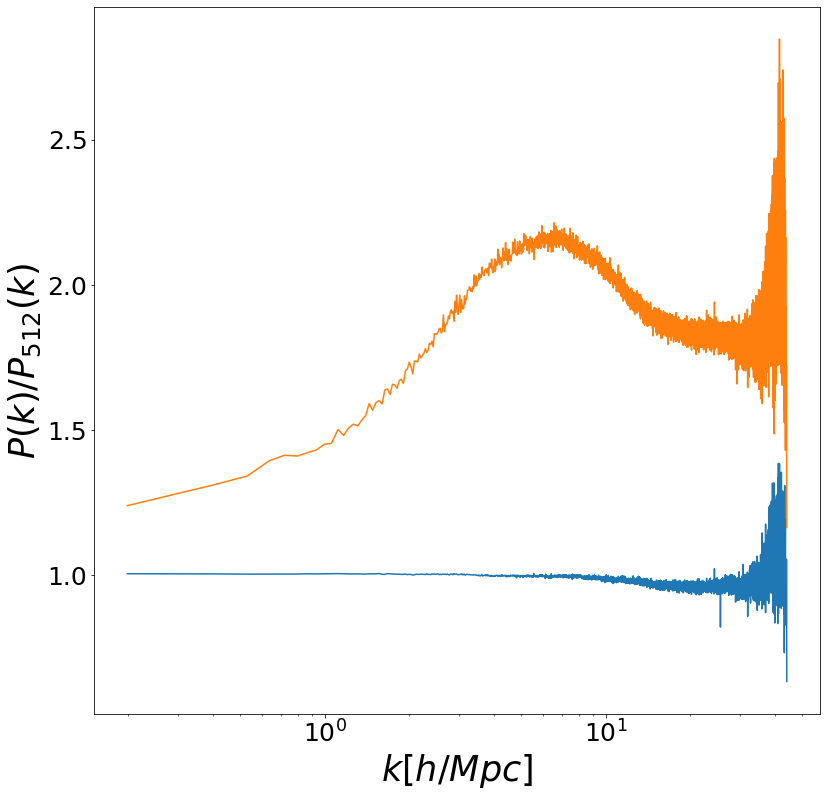

In [89]:
f = plt.figure(figsize=(13, 13))
plt.plot(k, proj_power_256/proj_power_512, label='sim256')
plt.plot(k, proj_power_sr_final/proj_power_512, label='SR_ckpt1')
#plt.plot(k, proj_power_sr2/proj_power_512, label='SR_ckpt11')
#plt.plot(k, proj_power_sr3/proj_power_512, label='SR_ckpt21')
#plt.plot(k, proj_power_sr4/proj_power_512, label='SR_ckpt31')
#plt.title('Relative Powerspectra', fontsize=30)
plt.xlabel(r'$k[h/Mpc]$', fontsize=35)
plt.ylabel(r'$P(k)/P_{512}(k)$', fontsize=35)
plt.tick_params(labelsize=25)
plt.xscale('log')
#plt.yscale('log')
#plt.legend(fontsize=12)
plt.show()

Compare whather switching the axes around makes any difference in the final result

In [43]:
sr_result = path_to_sr+'residual_learning_sr_output.npy'
switch_axes = path_to_sr+'residual_learning_sr_output_axis_change.npy'

In [44]:
sim = np.load(sr_result)
print(np.amax(sim))
print(np.amin(sim))
print(np.average(sim))  
delta1 =  (sim - np.average(sim))/np.average(sim)
k, pow_sr = powerspectrum(delta1)
rel_rho = (sim)/np.average(sim)
midpoints, histogram_sr_result = hist(rel_rho, -3., 5.)

sim = np.load(switch_axes)
print(np.amax(sim))
print(np.amin(sim))
print(np.average(sim))  
delta2 =  (sim - np.average(sim))/np.average(sim)
k, pow_switch = powerspectrum(delta2)
rel_rho = (sim)/np.average(sim)
midpoints, histogram_switch = hist(rel_rho, -3., 5.)
del sim

FileNotFoundError: [Errno 2] No such file or directory: '/u/ivkos/sr/Output/gan_loss_only/residual_learning_sr_output.npy'

In [ ]:
f = plt.figure(figsize=(13, 13))
plt.plot(k, pow_switch, label='switch')
plt.plot(k, pow_sr, label='sr')
plt.plot(k, proj_power_512, label='ground truth')
plt.xscale('log')
plt.yscale('log')
plt.title('Powerspectra', fontsize=30)
plt.xlabel(r'$k[h/Mpc]$', fontsize=20)
plt.ylabel(r'$P(k)[(h/Mpc)^3$', fontsize=20)
plt.legend(fontsize=12)
plt.show()

In [ ]:
f = plt.figure(figsize=(13, 13))
plt.plot(k, pow_switch/pow_sr, label='switch')
plt.xscale('log')
plt.title('Relative Powerspectra', fontsize=30)
plt.xlabel(r'$k[h/Mpc]$', fontsize=20)

plt.legend(fontsize=12)
plt.show()

In [ ]:
path_to_test = '/u/ivkos/sr/GriddedSimulationsTesting/'
path_to_train = '/u/ivkos/sr/GriddedSimulationsTraining/'

In [ ]:
sr_test = path_to_sr+'residual_learning_sr_output.npy'
sr_train = path_to_sr+'residual_learning_sr_output_train.npy'
sim512_grid512_test = path_to_test+'test256_grid512.npy'
sim512_grid512_train = path_to_train+'256_grid512.npy' 

In [ ]:
sim = np.load(sr_test)
print(np.amax(sim))
print(np.amin(sim))
print(np.average(sim))  
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, pow_sr_test = powerspectrum(delta)
midpoints, histogram_sr_result = hist(delta, -3., 5.)

sim = np.load(sr_train)
print(np.amax(sim))
print(np.amin(sim))
print(np.average(sim))  
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, pow_sr_train = powerspectrum(delta)
midpoints, histogram_switch = hist(delta, -3., 5.)

sim = np.load(sim512_grid512_test)
print(np.amax(sim))
print(np.amin(sim))
print(np.average(sim))  
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, pow_test = powerspectrum(delta)
midpoints, histogram_sr_result = hist(delta, -3., 5.)

sim = np.load(sim512_grid512_train)
print(np.amax(sim))
print(np.amin(sim))
print(np.average(sim))  
delta =  (sim - np.average(sim))/np.average(sim)
del sim
k, pow_train = powerspectrum(delta)
midpoints, histogram_switch = hist(delta, -3., 5.)

In [ ]:
f = plt.figure(figsize=(13, 13))
plt.plot(k, pow_sr_test, label='sr test')
plt.plot(k, pow_sr_train, label='sr train')
plt.plot(k, pow_test, label='test')
plt.plot(k, pow_train, label='train')
plt.xscale('log')
plt.yscale('log')
plt.title('Powerspectra', fontsize=30)
plt.xlabel(r'$k[h/Mpc]$', fontsize=20)
plt.ylabel(r'$P(k)[(h/Mpc)^3$', fontsize=20)
plt.legend()
plt.show()

In [ ]:
Image(filename='first_gen_residual_learning.png',width=300, height =800)

In [ ]:
Image(filename='first_crit_residual_learning.png',width=300, height=800)

In [ ]:
Image(filename='second_gen_residual_learning.png',width=300, height=800)

In [ ]:
Image(filename='second_crit_residual_learning.png',width=300, height =800)